<a href="https://colab.research.google.com/github/ivychung/plant-ML/blob/reading-database/Tomato1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from google.colab import drive
import zipfile
import os

In [ ]:
# Get the zip file to emp
zip_ref = zipfile.ZipFile('/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/dataset/PlantVillage.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
# getting classes
dataset_address = '/tmp/PlantVillage/'

classes = []
for file in os.listdir(PV_address):
    d = os.path.join(PV_address, file)
    if os.path.isdir(d):
        classes.append(file)

classes

['Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Leaf_Mold',
 'Tomato_Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Target_Spot',
 'Tomato_Bacterial_spot',
 'Tomato_healthy']

In [ ]:
# global variables to keep track of how many classes we have
CLASS_SIZE = len(classes)

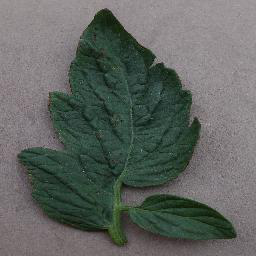

In [ ]:
img = tf.keras.preprocessing.image.load_img(dataset_address+classes[8]+'/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
img

In [ ]:
total = 0
for root, dirs, files in os.walk(dataset_address):
    total += len(files)
total

16013

In [ ]:
images = []

for i, class in enumerate(classes):
  images[0][i] = # image themselves
  images[1][i] = # labels